# Section 1 : Pandas

In [122]:
import pandas as pd

# Section 2 : Viewing and analyzing the data

# Section 2 : medical_df

In [123]:
medical_df = pd.read_csv('./data/medical-charges.csv')

In [124]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [125]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [126]:
# Statistics for the numerical columns

medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Section 3 : Exploratory Analysis and Visualization

# Section 3 : px, plt, sns

In [127]:
#! pip install plotly
import plotly.express as px # type: ignore
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Section 4 : Age column

In [129]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [130]:
#! pip install nbformat==5.1.2
#! pip install --upgrade pip
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)

# Section 5 : Body Mass Index

In [131]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

# Section 6 : Charges

In [132]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [133]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

# Section 7 : Smoker

In [134]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [135]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [136]:
fig = px.histogram(medical_df,
                   x='region',
                   color='sex',
                   facet_col='children',
                   marginal='box',
                   title='Annual Medical Charges by Region, Sex, and Children')
fig.update_layout(bargap=0.1)
fig.show()

# Section 8 : Age and Charges

In [137]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# Section 9 : BMI and Charges

In [138]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# Section 10 : Children and Charges 

In [139]:
px.violin(medical_df, x='children', y='charges')

In [140]:
"""
Create some more graphs to visualize
how the "charges" column is related to other columns
("children", "sex", "region" and "smoker").
Summarize the insights gathered from these graphs.
"""

#1. Violin Plot: Charges vs. Smoker
import plotly.express as px

fig = px.violin(medical_df,
                x='smoker',
                y='charges',
                color='smoker',
                box=True,
                points='all',
                title='Distribution of Medical Charges by Smoking Status')
fig.show()

In [141]:
#2. Violin Plot: Charges vs. Sex
fig = px.violin(medical_df,
                x='sex',
                y='charges',
                color='sex',
                box=True,
                points='all',
                title='Distribution of Medical Charges by Sex')
fig.show()

In [142]:
#Bar Plot: Average Charges by Region
avg_charges_by_region = medical_df.groupby('region')['charges'].mean().reset_index()

fig = px.bar(avg_charges_by_region,
             x='region',
             y='charges',
             color='region',
             title='Average Medical Charges by Region')
fig.show()

In [143]:
# Bar Plot: Average Charges by Number of Children
avg_charges_by_children = medical_df.groupby('children')['charges'].mean().reset_index()

fig = px.bar(avg_charges_by_children,
             x='children',
             y='charges',
             color='children',
             title='Average Medical Charges by Number of Children')
fig.show()

# Section 11 : Correlation

In [144]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [145]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [146]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [147]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [148]:
# convert categorical data into normal data
smokerValues = {'no':0,'yes':1}
smokerNumeric = medical_df.smoker.map(smokerValues)
smokerNumeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [149]:
medical_df.charges.corr(smokerNumeric)

np.float64(0.7872514304984778)

In [150]:
px.scatter(medical_df, x='age', y='age')

In [151]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

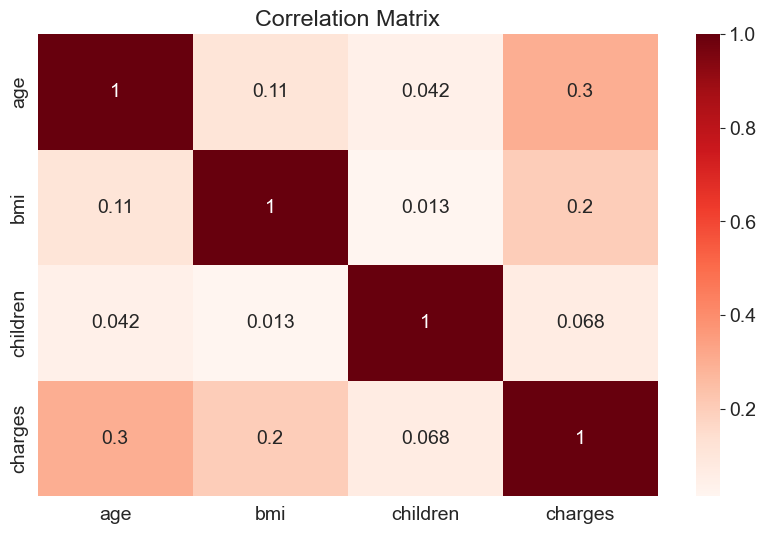

In [152]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

# Section 12 : Linear Regression using a Single Feature

# Section 12 : non_smoker_df

In [153]:
non_smoker_df = medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'Age vs.Charges'}, xlabel='age', ylabel='charges'>

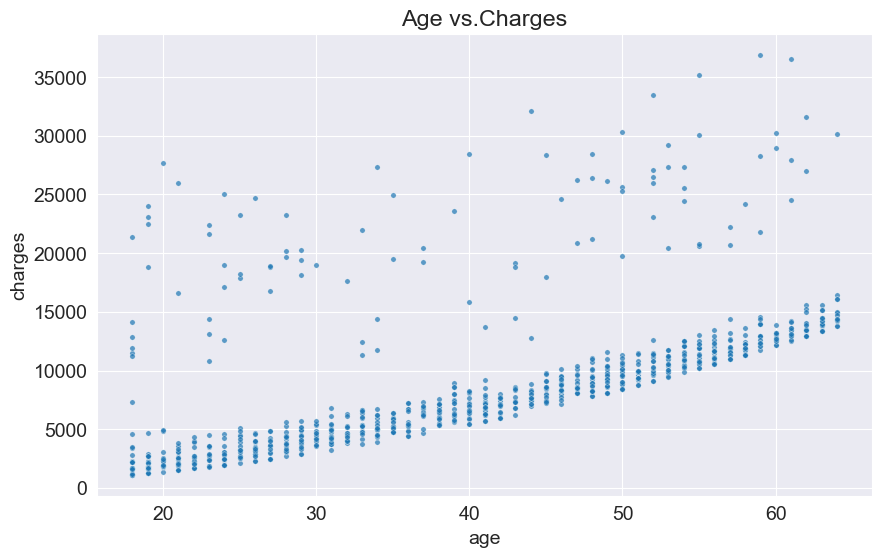

In [154]:
plt.title('Age vs.Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

# Section 12 : Estimated Charges function

In [155]:
def estimate_charges(age, w, b):
    return w * age + b

In [156]:
w = 50
b = 100

In [157]:
estimate_charges(40, w, b)

2100

In [159]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [160]:
estimateCharges = estimate_charges(ages, w, b)
estimateCharges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [161]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

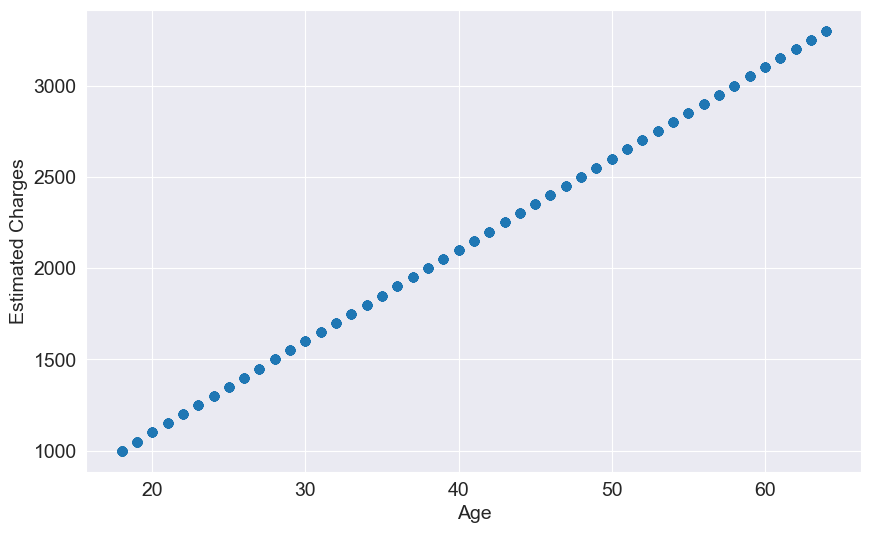

In [162]:
plt.scatter(ages, estimateCharges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

Text(0, 0.5, 'Estimated Charges')

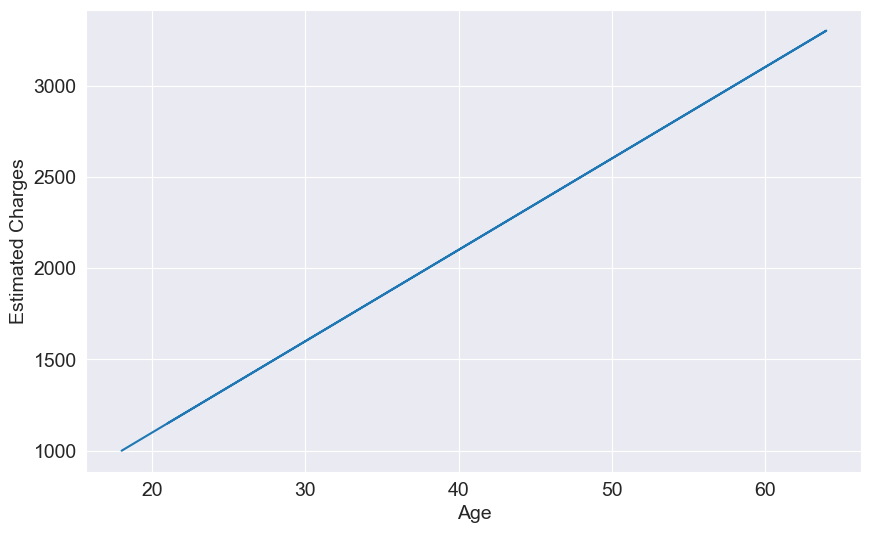

In [163]:
plt.plot(ages, estimateCharges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

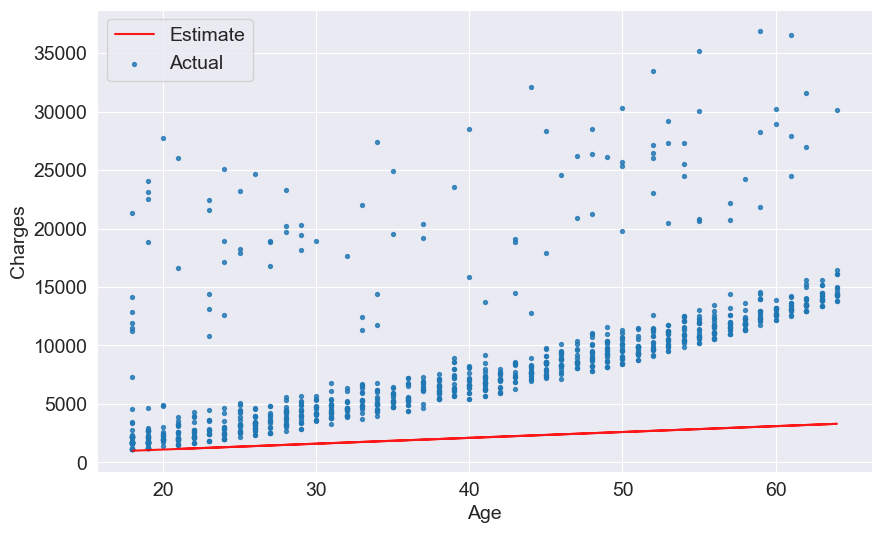

In [164]:
target = non_smoker_df.charges

plt.plot(ages, estimateCharges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

# Section 12 : try_parameters

In [165]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimateCharges = estimate_charges(ages, w, b)

    plt.plot(ages, estimateCharges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

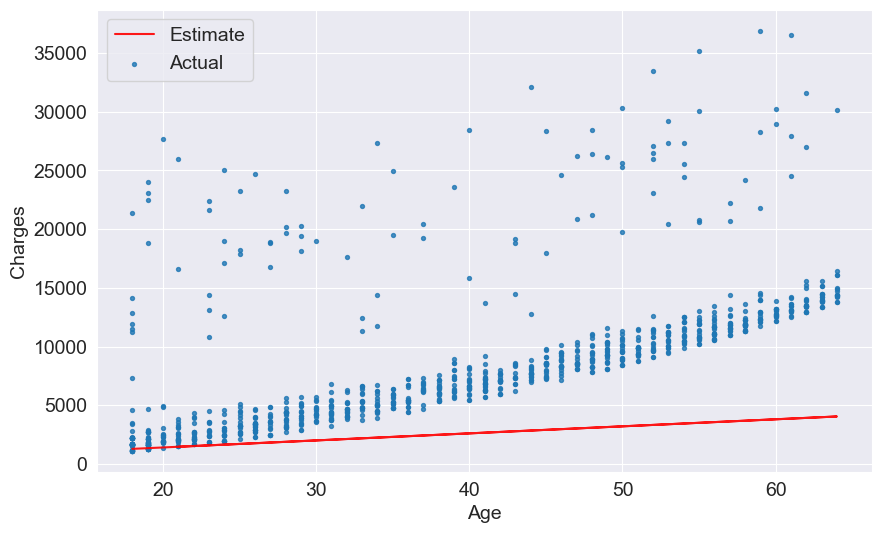

In [166]:
try_parameters(60, 200)

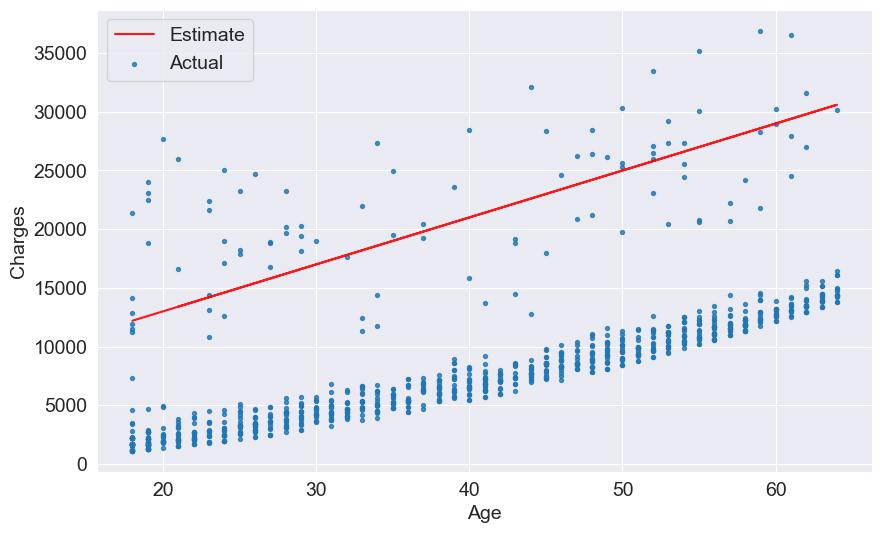

In [167]:
try_parameters(400, 5000)

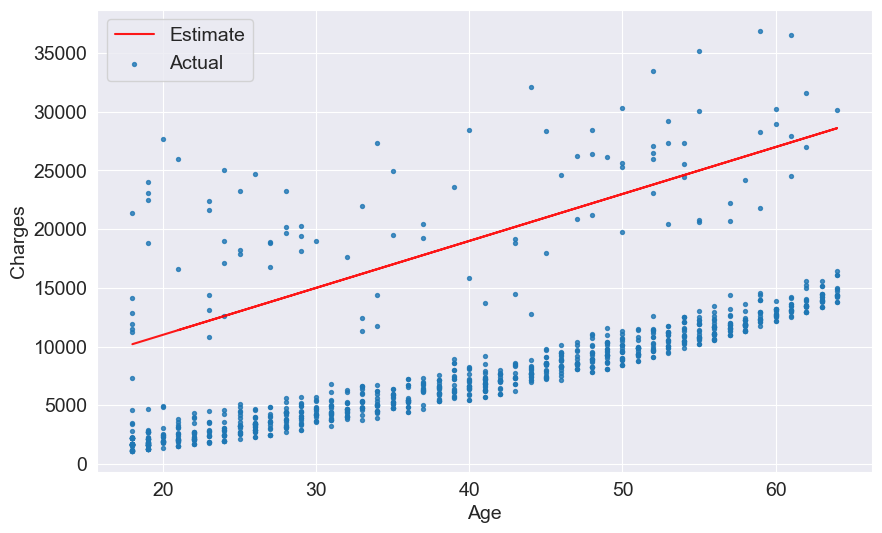

In [168]:
try_parameters(400, 3000)

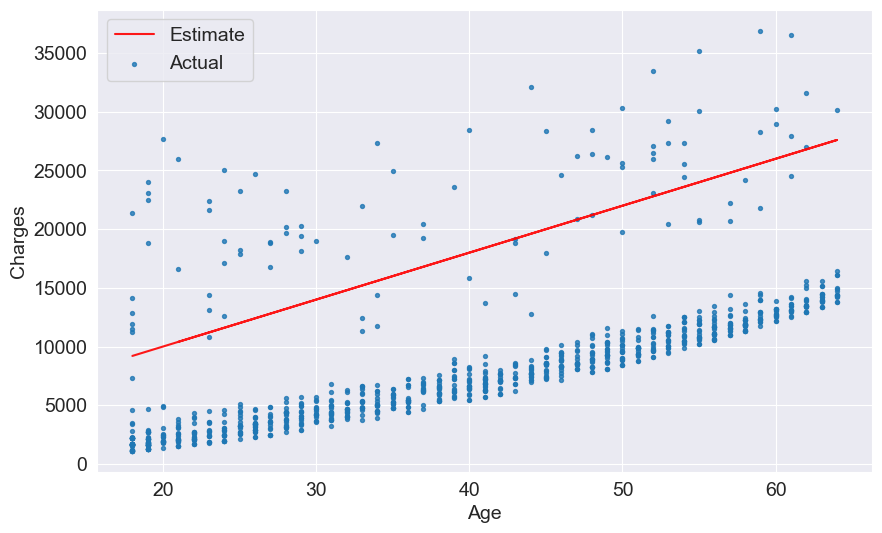

In [169]:
try_parameters(400, 2000)

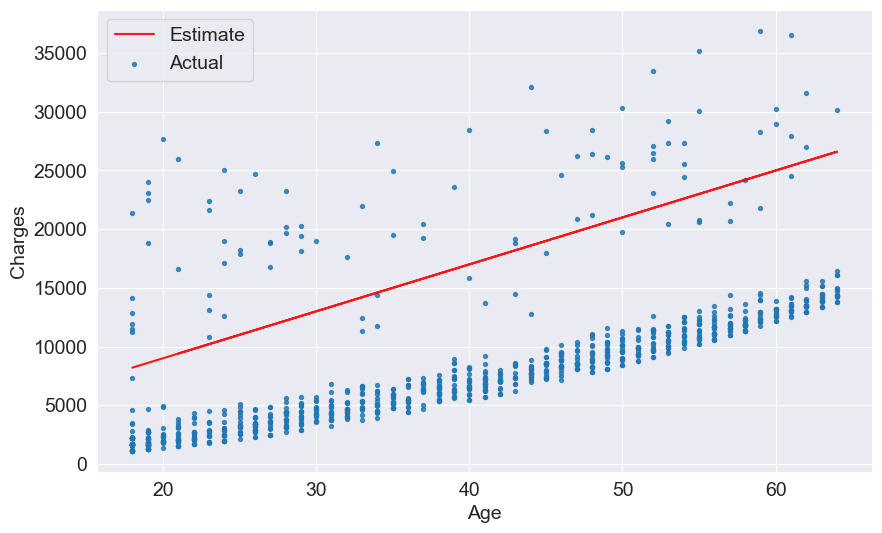

In [170]:
try_parameters(400, 1000)

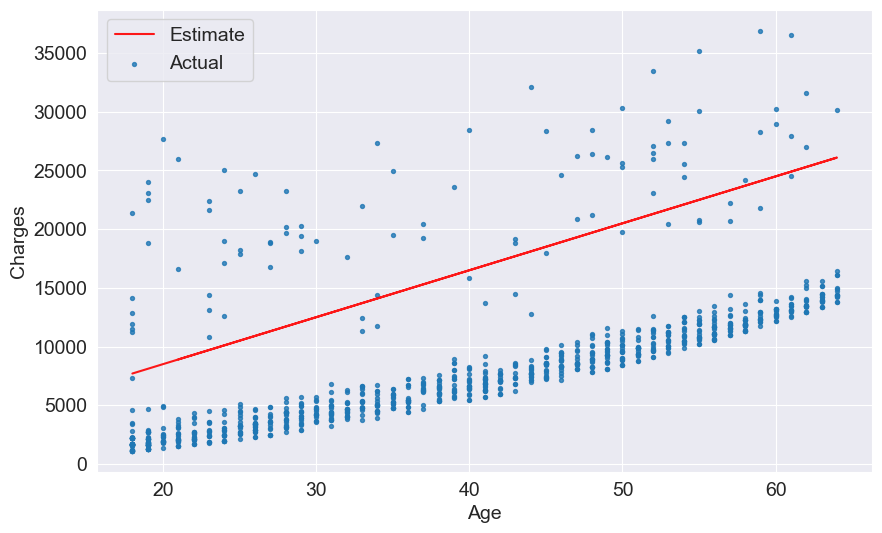

In [171]:
try_parameters(400, 500)

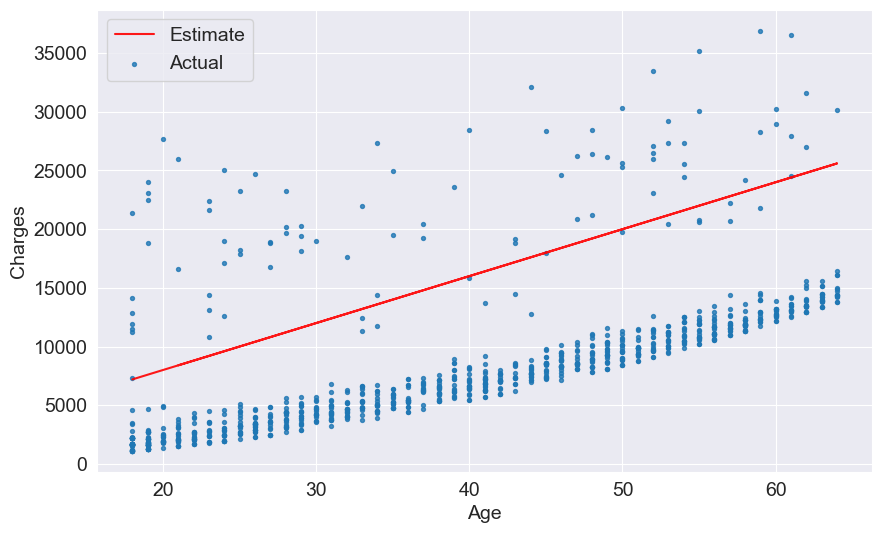

In [172]:
try_parameters(400, 0)

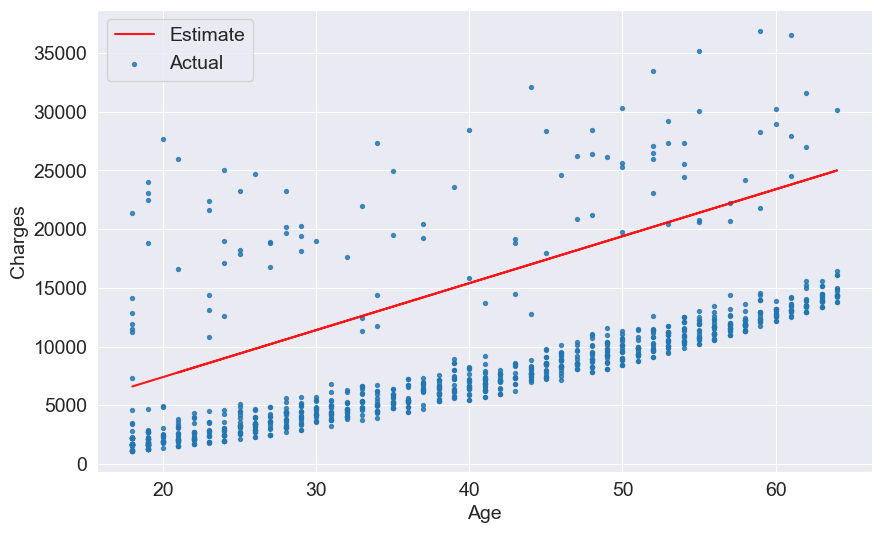

In [173]:
try_parameters(400, -600)

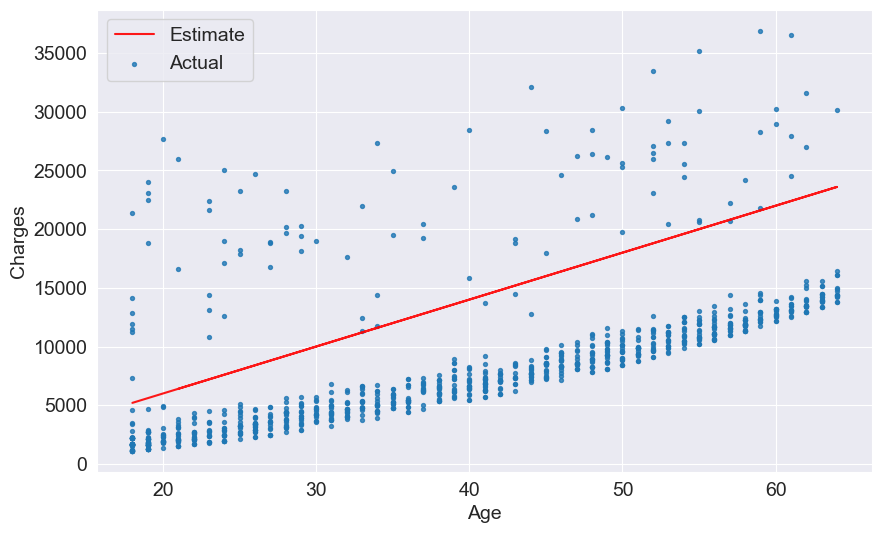

In [174]:
try_parameters(400, -2000)

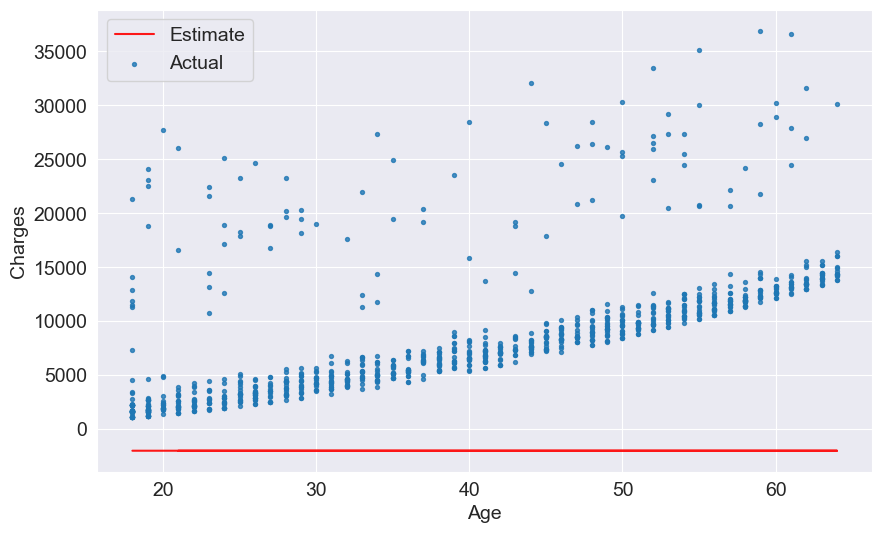

In [175]:
try_parameters(0, -2000)

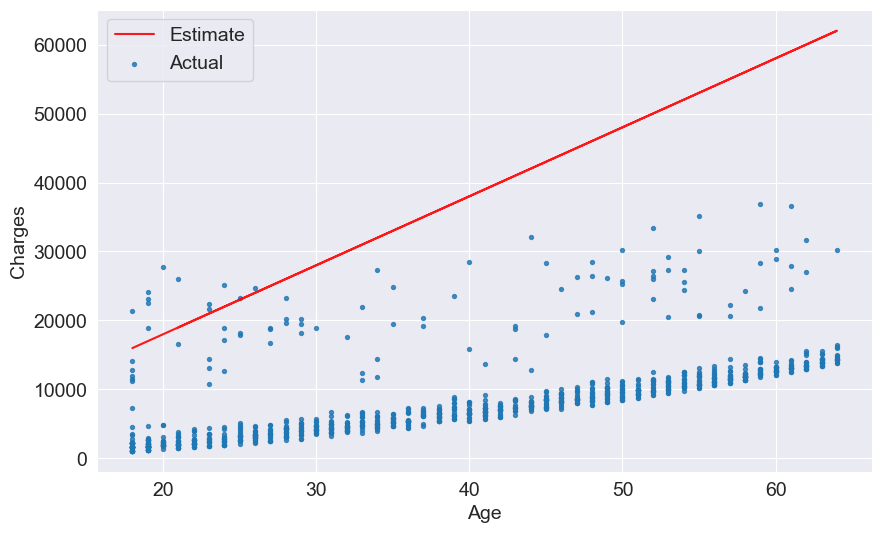

In [176]:
try_parameters(1000, -2000)

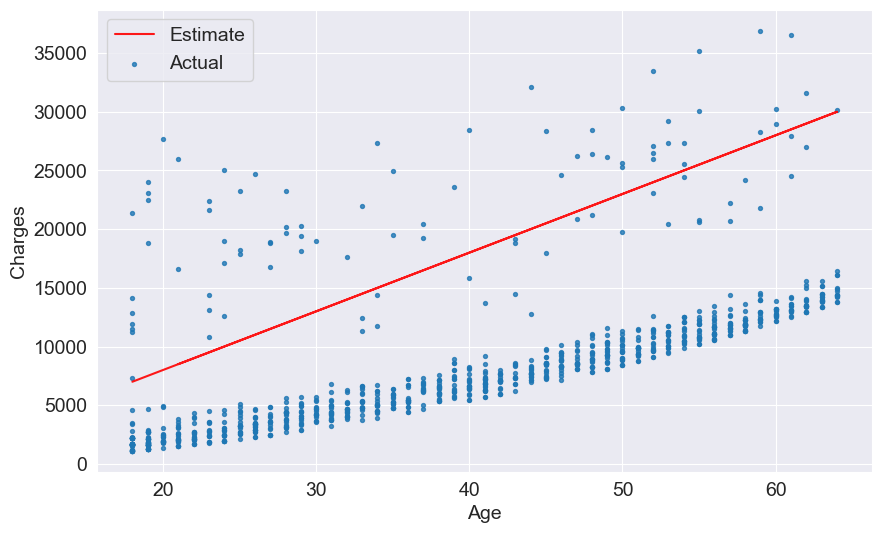

In [177]:
try_parameters(500, -2000)

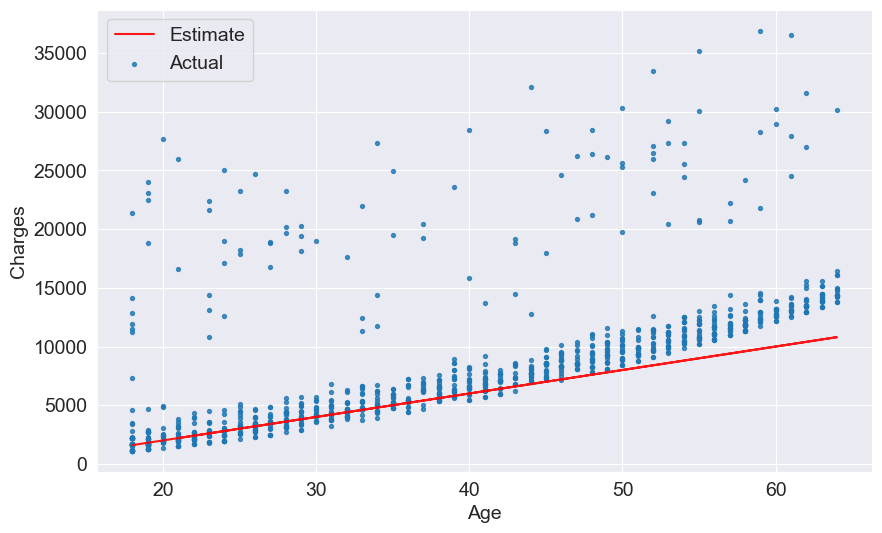

In [178]:
try_parameters(200, -2000)

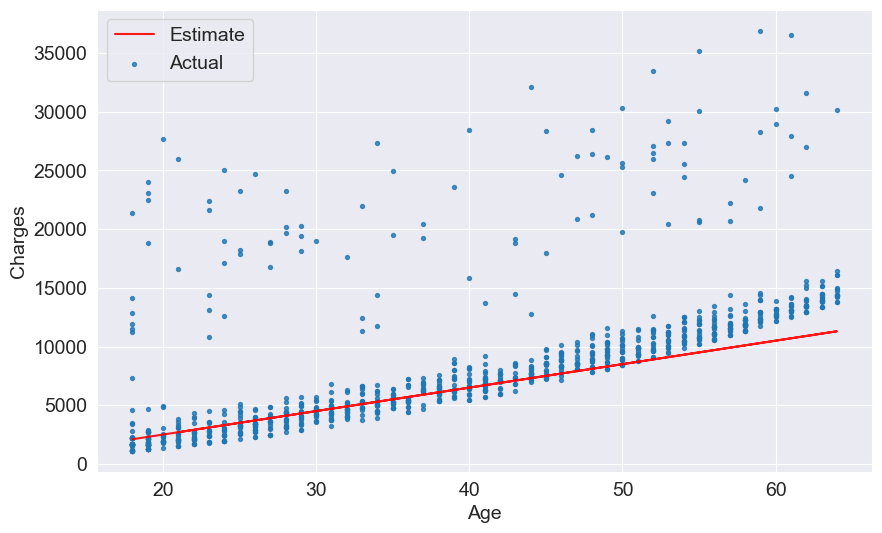

In [179]:
try_parameters(200, -1500)

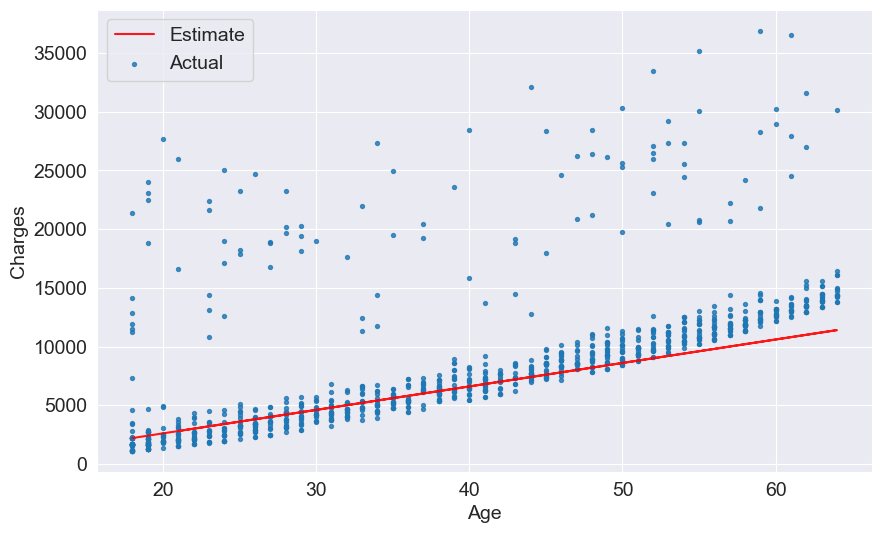

In [180]:
try_parameters(200, -1400)

In [181]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [182]:
predictions = estimateCharges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

# Section 13 : Loss/Cost Function

# Section 13 : Numpy

In [183]:
import numpy as np

# Section 13 : rmse function

In [184]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [185]:
w = 50
b = 100

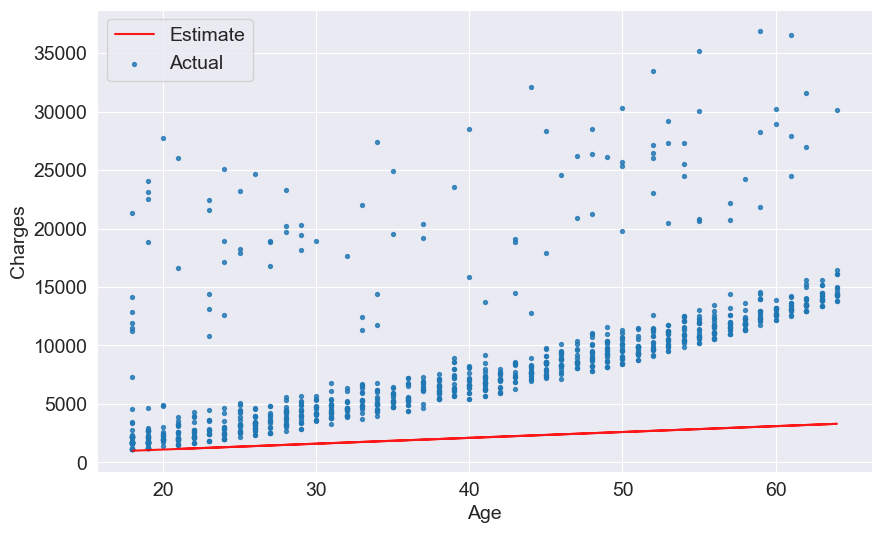

In [186]:
try_parameters(w, b)

In [187]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [188]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [189]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction','Actual'])

    loss = rmse(target, predictions)
    print("RMSE Loss : ", loss)

RMSE Loss :  4686.97290587829


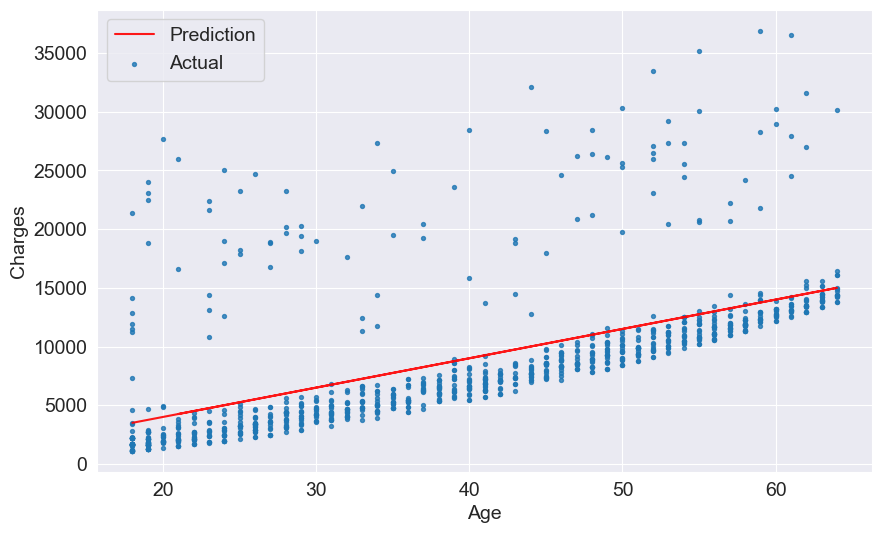

In [ ]:
try_parameters(250, -1000)

# Section 14 : Linear Regression using Scikit-learn

# Section 14 : Scikit-Learn

In [190]:
#! pip install scikit-learn
from sklearn.linear_model import LinearRegression # type: ignore

# Section 14 : model

In [191]:
model = LinearRegression()

In [192]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [193]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape : ', inputs.shape)
print('targets.shape : ', targets.shape)

inputs.shape :  (1064, 1)
targets.shape :  (1064,)


In [194]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [195]:
type(inputs)

pandas.core.frame.DataFrame

In [196]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [197]:
model.predict(np.array(([23],
                        [37],
                        [61])))

C:\Users\kanak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [198]:
predictions = model.predict(inputs)

In [199]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [200]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [201]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [202]:
#w
model.coef_

array([267.24891283])

In [203]:
#b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss :  4662.505766636395


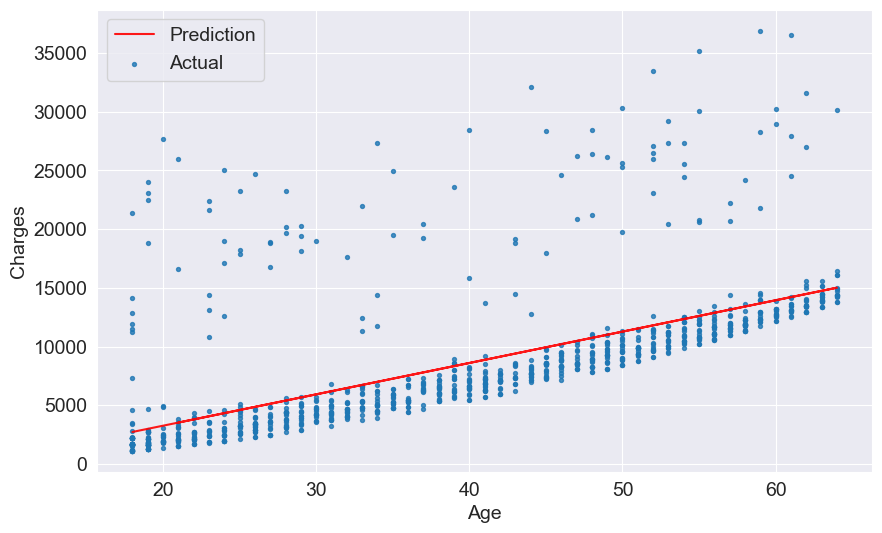

In [204]:
try_parameters(model.coef_, model.intercept_)

In [205]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ', loss)

Loss :  4662.505766636395


# Section 15 : Linear Regression using Multiple Features

In [206]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss :', loss)

Loss : 4662.3128354612945


In [208]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

In [207]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [209]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [210]:
# Create inputs and targets
inputs, targets = non_smoker_df[['bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ', loss)

Loss :  5969.772531913293


In [211]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

In [212]:
fig = px.strip(non_smoker_df, x='children', y='charges', title='Children vs. Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)

In [213]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [214]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create inputs and targets
inputs = medical_df[['age', 'bmi', 'children']]
targets = medical_df['charges']

# Create and train the model
model = LinearRegression()         
model.fit(inputs, targets)         

# Generate predictions
predictions = model.predict(inputs)

# Compute RMSE loss
rmse = rmse(targets, predictions)
print('Loss :', rmse)

Loss : 11355.317901125973


# Section 16 : Using Categorical Features for Machine Learning

<Axes: xlabel='smoker', ylabel='charges'>

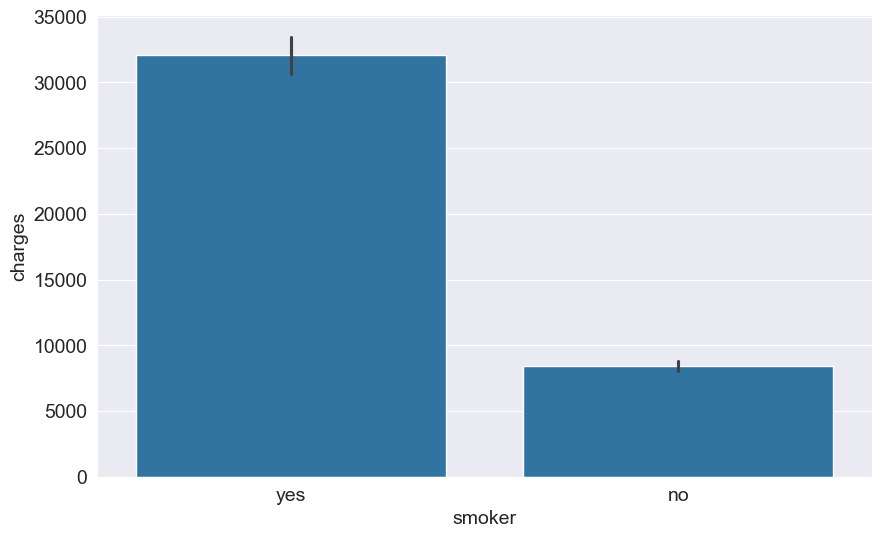

In [215]:
# Binary Categories

sns.barplot(data=medical_df, x='smoker', y='charges')

# Section 16 : smoker_code

In [216]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [217]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [218]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Create inputs and targets
inputs = medical_df[['age', 'bmi', 'children','smoker_code']]
targets = medical_df['charges']

# Create and train the model
model = LinearRegression()         
model.fit(inputs, targets)         

# Generate predictions
predictions = model.predict(inputs)

# Compute RMSE loss
rmse = rmse(targets, predictions)
print('Loss :', rmse)

Loss : 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

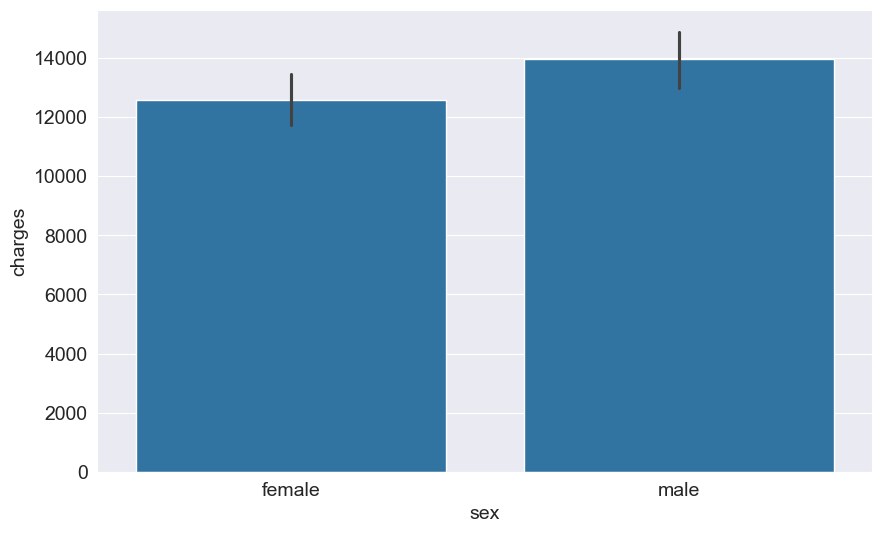

In [220]:
sns.barplot(data=medical_df, x='sex', y='charges')

# Section 16 : sex_codes

In [221]:
sex_codes = {'female':0, 'male':1}

In [222]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [223]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [224]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.05729206220202533)

In [225]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [226]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ', loss)

Loss :  6056.100708754546


# Section 17 : One-Hot Encoding

<Axes: xlabel='region', ylabel='charges'>

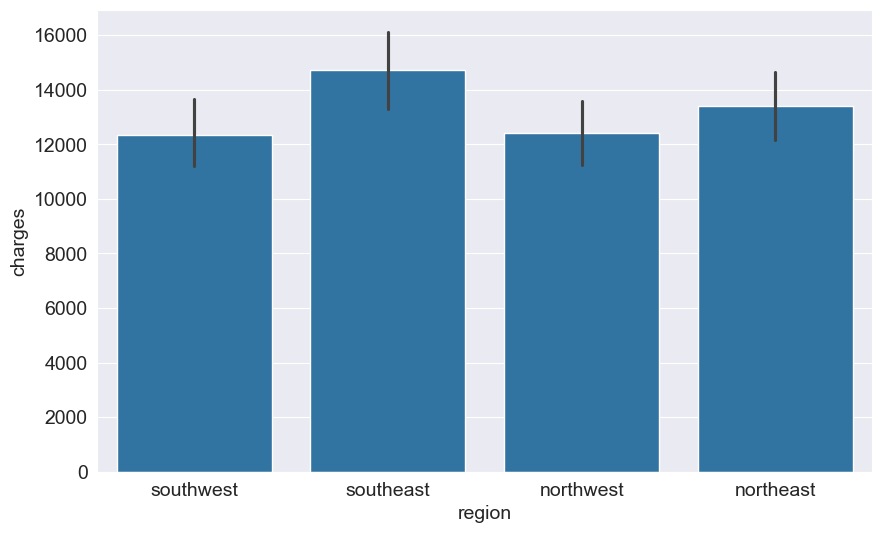

In [227]:
sns.barplot(data=medical_df, x='region', y='charges')

In [228]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [229]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

C:\Users\kanak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [230]:
medical_df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [231]:
oneHot = enc.transform(medical_df[['region']]).toarray()
oneHot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [232]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = oneHot

In [233]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [234]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ', loss)

Loss :  6041.6796511744515


# Section 18 : Model Improvements

# Section 18 : Feature Scaling

In [235]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [236]:
model.intercept_

np.float64(-12525.54781119545)

# Section 18 : weights_df

In [237]:
weights_df = pd.DataFrame({
    'feature' : np.append(input_cols, 1),
    'weight' : np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [238]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [239]:
from sklearn.preprocessing import StandardScaler

# Section 18 : Scaler

# Section 18 : numeric_cols

In [240]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [241]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [242]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [243]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


# Section 18 : scaled_inputs

In [244]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

# Section 18: cat_cols

In [247]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [250]:
inputs

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [276]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ', loss)

Loss :  6041.679651174452


In [277]:
np.round(model.coef_, decimals=2)

array([ 3607.47,  2067.69,   573.  , 23848.53,  -131.31,   587.01,
         234.05,  -448.01,  -373.04])

In [280]:
np.round(model.intercept_, decimals=2)

np.float64(8466.48)

In [279]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


# Section 19 : Creating a Test Set

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [283]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6399.7578298387125


In [284]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6002.507753499376
